In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split ,cross_val_score ,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score ,accuracy_score
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost.

In [2]:
df= pd.read_csv("train.csv")

In [4]:
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [5]:
obj_feat= []
for i in df:
    if df[i].dtype == "O":
        obj_feat.append(i)

In [6]:
df["ID"].describe()

count    4209.000000
mean     4205.960798
std      2437.608688
min         0.000000
25%      2095.000000
50%      4220.000000
75%      6314.000000
max      8417.000000
Name: ID, dtype: float64

In [7]:
df["ID"].describe().loc["std"]


2437.60868844798

In [8]:
df["ID"].describe()

count    4209.000000
mean     4205.960798
std      2437.608688
min         0.000000
25%      2095.000000
50%      4220.000000
75%      6314.000000
max      8417.000000
Name: ID, dtype: float64

In [9]:
np.std(df["ID"])

2437.319100245182

In [10]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
obj_feat

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [12]:
dict_obj = {}
for i in obj_feat:
    dict_obj[i]=df[i].unique()

In [13]:
dict_obj


{'X0': array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
        'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
        'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
        'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
       dtype=object),
 'X1': array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
        'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
        'ab'], dtype=object),
 'X2': array(['at', 'av', 'n', 'e', 'as', 'aq', 'r', 'ai', 'ak', 'm', 'a', 'k',
        'ae', 's', 'f', 'd', 'ag', 'ay', 'ac', 'ap', 'g', 'i', 'aw', 'y',
        'b', 'ao', 'al', 'h', 'x', 'au', 't', 'an', 'z', 'ah', 'p', 'am',
        'j', 'q', 'af', 'l', 'aa', 'c', 'o', 'ar'], dtype=object),
 'X3': array(['a', 'e', 'c', 'f', 'd', 'b', 'g'], dtype=object),
 'X4': array(['d', 'b', 'c', 'a'], dtype=object),
 'X5': array(['u', 'y', 'x', 'h', 'g', 'f', 'j', 'i', 'd', 'c', 'af', 'ag', 'ab',
       

In [14]:
df["X11"].describe().quantile()

0.0

In [15]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# col=[]
# for i in df:
#     if df[i].describe().std()!=0:
#         col.append(i)

In [17]:
# len(col)

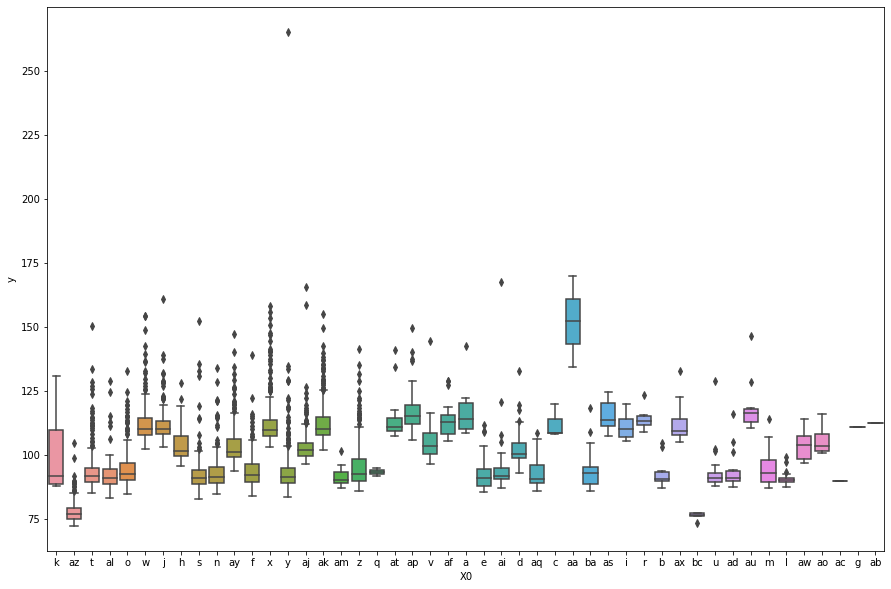

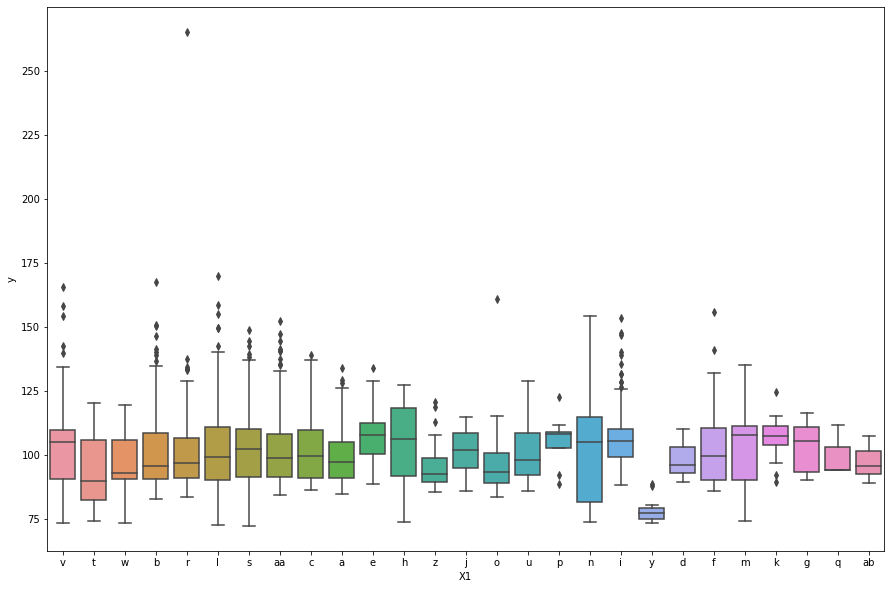

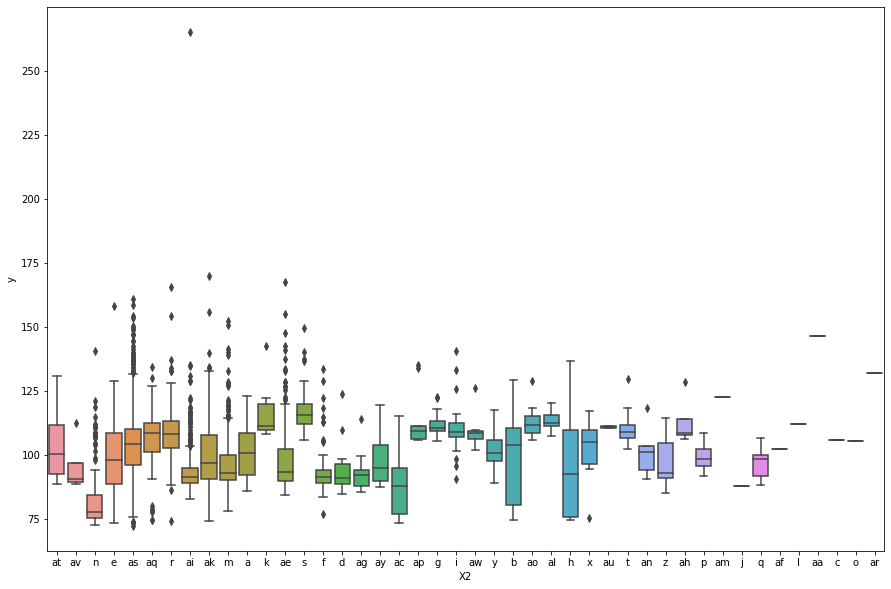

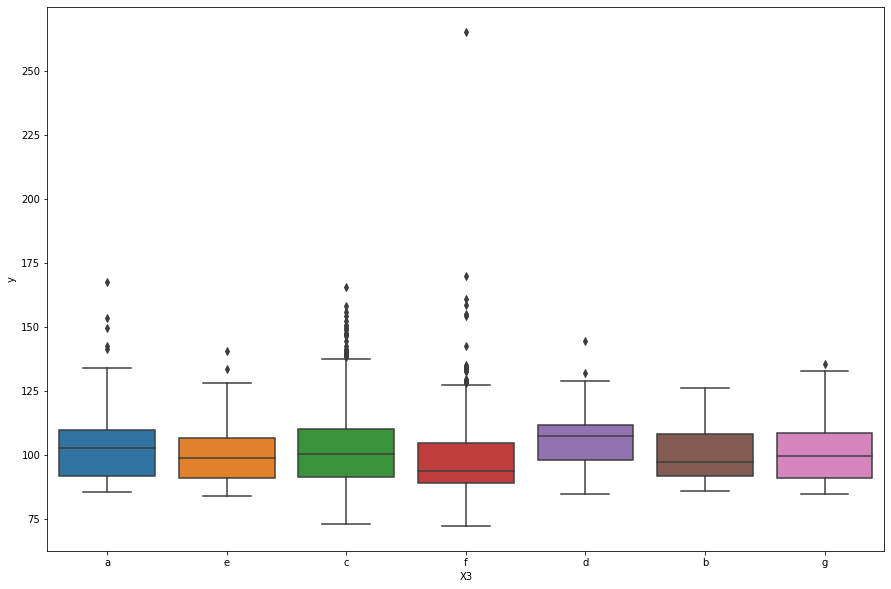

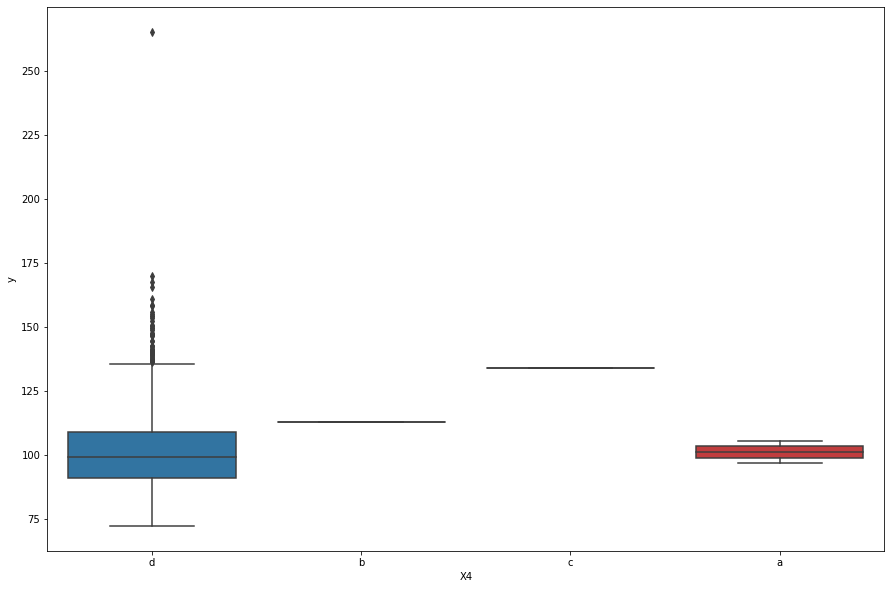

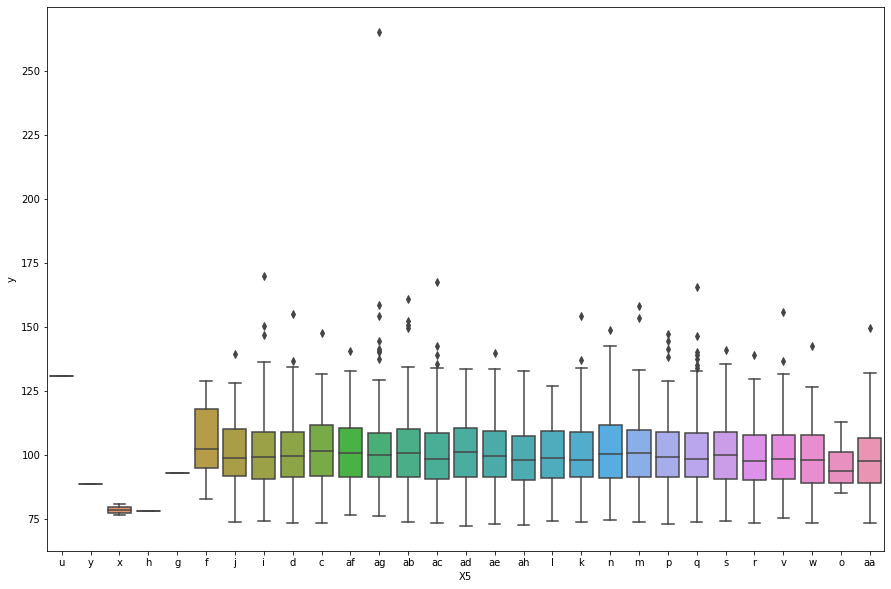

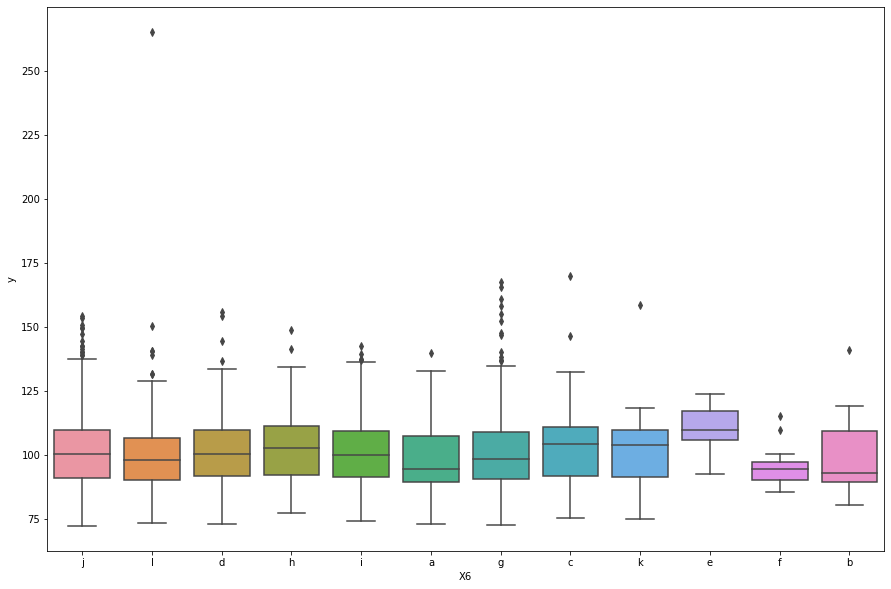

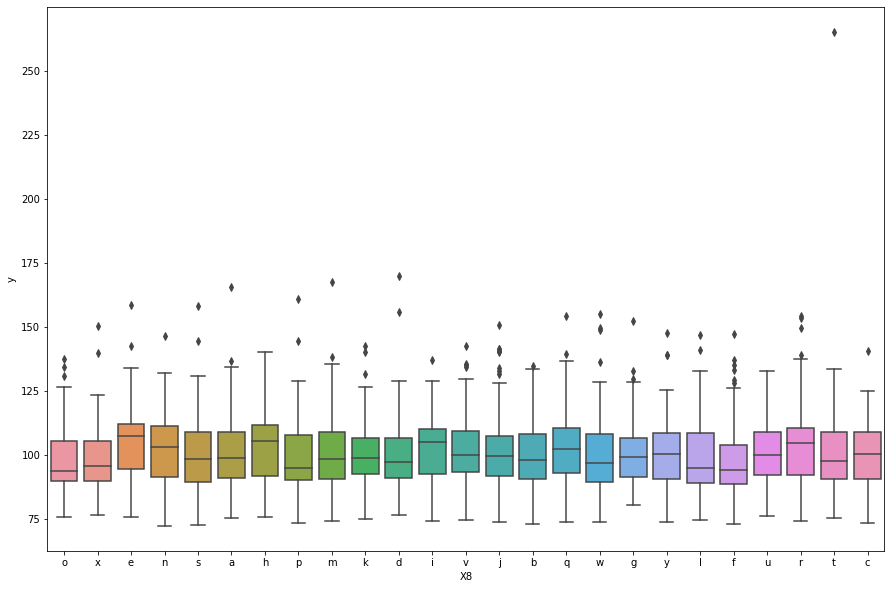

In [18]:
for i in obj_feat:
    
    plt.figure(figsize=(15,10))
    sns.boxplot(x=i,y="y",data=df)

In [19]:
col_num = []
for i in df:
    if i not in obj_feat:
        col_num.append(i)

In [20]:
col_not_std=[]
for feature in col_num:
    if  df[feature].describe().loc["std"]==0.0:
        col_not_std.append(feature)
        
        
    
    
    

In [21]:
len(col_not_std)

12

In [22]:
col_not_std

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [23]:
df.drop(col_not_std,axis=1,inplace=True)
    

In [24]:
le= LabelEncoder()

In [25]:
for i in obj_feat:
    le.fit(df[i])
    df[i]=le.transform(df[i])

In [26]:
obj_feat

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [27]:
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,8,20,16,2,3,0,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,31,16,40,3,3,0,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,8,23,38,0,3,0,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,9,19,25,5,3,0,11,20,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.drop("ID",axis=1,inplace=True)

In [29]:
X= df.drop("y",axis=1)
y=df["y"]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [31]:
# ss= StandardScaler()
# ss.fit_transform(X_train)


# ss.transform(X_test)

In [32]:
pca= PCA(21,random_state=0)

In [33]:
t=pca.fit_transform(X_train)
p = pca.fit_transform(X_test)

In [34]:
pd.DataFrame(t)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-6.476000,-13.362673,-0.473320,-9.817516,-7.794330,0.598451,3.780449,0.743382,0.541610,-0.958718,...,-0.064170,0.526234,-0.887983,1.177710,0.019165,-1.086292,-0.336127,-0.186913,-0.084463,-0.144849
1,-5.285382,0.869287,-3.975757,7.027701,-5.900688,-2.332429,-2.588483,-0.731863,-0.739972,-0.112493,...,-1.153800,0.871381,0.559338,-1.289284,-0.403895,1.338680,-0.384031,-0.355326,-0.194826,0.203511
2,-14.653578,-5.731304,0.541283,13.714553,-6.062607,-2.804719,-2.213211,2.174906,1.814114,1.038569,...,0.005638,-0.462628,0.850764,-1.091239,-0.068305,0.049098,-0.716412,-0.325978,0.112404,-0.498849
3,0.103730,16.504874,0.011380,13.355245,9.339067,4.259748,1.506776,0.431625,-1.161617,-1.795808,...,-0.584798,0.549560,0.362522,0.787739,-0.014210,0.432720,0.279435,0.195277,-0.540546,-0.521496
4,-16.220481,2.134114,-3.088186,-5.000756,6.600772,-0.721162,-0.815198,-2.379802,0.291683,0.317672,...,0.464085,1.230449,-1.569917,-0.409128,-0.271705,0.105510,0.069081,0.066280,-0.263198,-1.182689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,-11.489996,20.532982,-9.234794,-1.802734,-1.257505,-3.347512,-2.273467,-0.636218,-0.467841,-0.211640,...,0.851278,0.656814,-2.008521,0.375971,1.028768,-0.530509,-0.143398,1.057086,-0.187092,-0.094888
3152,-9.320755,1.053027,14.387402,2.918094,-7.733430,0.347745,0.175983,-3.117241,0.269376,0.077975,...,1.389619,0.070867,1.597783,0.234691,0.192593,-1.254761,0.633121,0.372541,-0.222058,0.173287
3153,-11.684252,2.311553,-11.762519,1.784804,-2.252760,-1.944148,1.027607,-1.344743,0.880715,-0.932622,...,-0.604749,-0.353849,-0.344536,-0.377463,-0.486241,0.895570,-0.150268,0.239152,-0.090504,0.241933
3154,-10.146362,1.673577,9.849367,6.876379,-8.768405,0.502660,-2.222467,-2.575053,-1.528730,0.028580,...,-0.273193,-1.407306,-0.921504,0.219298,0.116276,-1.190581,1.263280,-0.010095,-0.190731,-0.285365


In [35]:
pd.DataFrame(p)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,20.373776,-8.525635,7.472605,-7.221579,8.933514,3.854750,2.484948,1.314071,0.057153,0.277428,...,-0.269653,-0.934585,1.003729,1.059191,-1.003296,0.182182,0.493006,-0.156261,0.069997,-0.604599
1,-15.698658,13.098783,-1.008662,-6.340475,6.906467,-3.613364,0.481880,-0.552025,1.119416,-1.011254,...,-0.277247,0.818487,-0.358285,0.997152,0.149028,-0.047555,-0.614146,1.605537,0.986533,0.259656
2,-14.442229,2.666854,3.011134,-3.030914,6.417001,-2.285059,-1.745169,1.137573,1.471097,2.759998,...,0.631894,-1.367740,0.839217,-1.161462,-0.039693,-0.522507,1.070302,1.822805,-0.036976,-0.446273
3,-5.559677,25.149321,1.890510,9.886949,-7.844246,7.079607,2.224236,-0.922317,-2.814026,0.492108,...,-1.012424,-1.054665,0.732367,0.934129,1.376025,-0.178470,-0.122929,-0.171858,-0.787821,-0.385034
4,-7.125149,19.982253,0.295995,-10.431083,-8.139608,-1.488429,0.870065,-0.831757,0.566557,-1.881370,...,-0.489932,0.545141,-0.283318,-0.575138,-0.449765,-0.084772,-0.538749,1.426757,1.070633,0.230365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,-5.500549,-2.609456,5.287366,-12.748871,8.283633,3.936189,-2.839930,-0.124887,-0.019986,-0.415012,...,0.268317,1.483884,-0.756176,0.965927,0.221702,-0.765722,0.041903,-0.115116,-0.508132,0.122743
1049,22.379303,-6.557446,1.453893,2.333344,-11.499548,0.642510,-0.575171,2.017499,-0.052643,-1.150439,...,0.020744,0.472810,-0.024400,-0.276367,-1.180284,-1.391383,0.063208,0.380529,0.459185,0.497597
1050,-10.143733,-12.684735,-1.660872,6.786428,4.382704,0.731130,1.819178,-0.765808,0.382040,0.460812,...,-0.987461,1.269420,0.010977,-0.830875,-0.032368,-0.656638,-0.258911,0.389073,-0.211717,-0.453316
1051,-7.840782,-7.520675,9.383327,0.146569,8.009150,-1.255195,2.654446,-0.524206,0.132793,0.406074,...,-0.647480,0.053495,1.632512,0.209664,0.144123,-0.533698,0.505283,-0.698502,-0.553729,0.774247


In [36]:
import xgboost


In [37]:
xgb=xgboost.XGBRegressor()

In [38]:
parameter = {"n_estimators" : [16,17,19,20],"max_depth":[4],"learning_rate":[0.4,0.6,0.5],"gamma":[0,0.0001]}

In [39]:
grid=GridSearchCV(xgb,parameter,cv=7,verbose=1,scoring= "r2")

In [40]:
grid.fit(X_train,y_train)

Fitting 7 folds for each of 24 candidates, totalling 168 fits


GridSearchCV(cv=7,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [41]:
grid.best_params_

{'gamma': 0, 'learning_rate': 0.4, 'max_depth': 4, 'n_estimators': 16}

In [42]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=16, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
# estimator=xgb(base_score=0.5, booster='gbtree',
#               colsample_bylevel=1, colsample_bynode=1,
#               colsample_bytree=1, gamma=0, gpu_id=-1,
#                                     importance_type='gain',
#                                     interaction_constraints='',
#                                     learning_rate=0.300000012, max_delta_step=0,
#                                     max_depth=6, min_child_weight=1,
#                                     missing=nan, monotone_constraints='()',
#                                     n_estimators=100, n_jobs=8,
#                                     num_parallel_tree=1, random_state=0,
#                                     reg_alpha=0, reg_lambda=1,
#                                     scale_pos_weight=1, subsample=1,
#                                     tree_method='exact', validate_parameters=1,
#                                     verbosity=None)

In [44]:
cross_val_score(xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=4,
             min_child_weight=1,  monotone_constraints='()',
             n_estimators=16, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None),
                X=X_train,
                y=y_train,
                scoring="r2",
                cv=7,
                n_jobs=-1,
                verbose=1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    5.9s finished


array([0.55943371, 0.57289388, 0.53322128, 0.56604834, 0.61903716,
       0.5803359 , 0.58801994])

In [45]:
mean=np.mean([[0.55943371, 0.57289388, 0.53322128, 0.56604834, 0.61903716,
       0.5803359 , 0.58801994]])

In [46]:
mean

0.5741414585714286

In [47]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
# xgb.score(X_train,y_train)

In [49]:
predict=xgb.predict(X_test)

In [50]:
r2_score(y_test,predict)

0.43437910621344344